<a href="https://colab.research.google.com/github/aaingyunii/Bootcamp_DeepLearning/blob/main/13_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Down sampling과 Up sampling
- Down sampling
    - Convolution을 진행하면서 입력 이미지의 크기를 줄여가는 것
    - convolution의 stride나 Pooling layer를 이용해 줄인다.
- Up sampling
    - Convolution을 진행하면서 입력 이미지의 크기를 늘려가는 것
    - 보통 convolution의 stride나 Pooling layer를 이용해 줄여진 이미지를 다시 원래 크기로 복원 시킬때 많이 사용된다.

# UpSampling
- tensorflow.keras.layers.UpSampling2D 사용.
- 단순히 늘린다.
    - 크기를 늘리는 resizing을 한 뒤 빈 공간을 채운다.
- UpSampling2D로 입력 이미지의 사이즈를 늘린 뒤 Conv2D를 연결해서 학습이 되도록 한다.
- 하이퍼파라미터
    - size=(2,2) : 입력을 몇배로 크게 만들지 지정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
X = np.arange(1, 5).reshape(1, 2, 2, 1)
X.shape

(1, 2, 2, 1)

In [ ]:
X.squeeze()

array([[1, 2],
       [3, 4]])

In [ ]:
# interpolation='nearest' : default, 'bilinear' 두가지 방식 제공
model = keras.Sequential()

# model.add(layers.UpSampling2D(size=3, input_shape=(2,2,1))) # interpolation='nearest' : default

model.add(layers.UpSampling2D(size=5, interpolation='bilinear', input_shape=(2,2,1)))
# bilinear -> 빈공간을 선형적으로 증가하는 값들로 채운다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_3 (UpSamplin  (None, 10, 10, 1)         0         
 g2D)                                                            
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_up = model.predict(X)
X_up.shape, X.shape

1/1 [==============================] - 0s 29ms/step


((1, 10, 10, 1), (1, 2, 2, 1))

In [ ]:
X_up.squeeze()

array([[1.       , 1.       , 1.       , 1.2      , 1.4000001, 1.6      ,
        1.8000001, 2.       , 2.       , 2.       ],
       [1.       , 1.       , 1.       , 1.2      , 1.4000001, 1.6      ,
        1.8000001, 2.       , 2.       , 2.       ],
       [1.       , 1.       , 1.       , 1.2      , 1.4000001, 1.6      ,
        1.8000001, 2.       , 2.       , 2.       ],
       [1.4      , 1.4      , 1.4      , 1.6      , 1.8000001, 2.       ,
        2.2      , 2.4      , 2.4      , 2.4      ],
       [1.8000001, 1.8000001, 1.8000001, 2.       , 2.2000003, 2.4      ,
        2.6000001, 2.8000002, 2.8000002, 2.8000002],
       [2.2      , 2.2      , 2.2      , 2.4      , 2.6000001, 2.8      ,
        3.       , 3.2      , 3.2      , 3.2      ],
       [2.6000001, 2.6000001, 2.6000001, 2.8000002, 3.0000002, 3.2      ,
        3.4      , 3.6000001, 3.6000001, 3.6000001],
       [3.       , 3.       , 3.       , 3.2      , 3.4      , 3.6      ,
        3.8000002, 4.       , 4.     

##  Transpose Convolution
- tensorflow.keras.layers.Conv2DTranspose 를 이용
- parameter가 있는 Filter를 이용해 입력 이미지의 사이즈를 늘린다.
    - convolution 계산을 역으로 하는 방식을 사용한다.
- padding을 same으로 하고 strides로 크기를 정한다.
    - size가 strides로 지정한 배수 만큼 늘어난다.


In [ ]:
model = keras.Sequential()
model.add(layers.Conv2DTranspose(kernel_size=3,
                                 filters=12,
                                 strides=2,
                                 padding='same',
                                 input_shape=(2,2,1)
                                )
         )

In [ ]:
X_up2 = model.predict(X)
X.shape, X_up2.shape

1/1 [==============================] - 0s 73ms/step


((1, 2, 2, 1), (1, 4, 4, 12))

In [ ]:
X_up2[0]

array([[[ 9.2426375e-02, -3.6595762e-04, -2.0969853e-02, -1.5178064e-01,
          1.3067992e-01, -2.2402893e-01,  1.4939640e-01,  1.9042479e-01,
          7.0587412e-02,  1.0983010e-01,  7.2524503e-02,  1.0537420e-01],
        [ 1.2078254e-01,  1.0845812e-01,  9.9176005e-02, -1.5548368e-01,
         -6.4056367e-02,  9.1645584e-02, -1.0391460e-01,  1.7036274e-02,
         -9.1081545e-02, -1.2486404e-01, -4.8257425e-02, -1.4483613e-01],
        [ 2.2374080e-01, -1.5987317e-01, -5.5075765e-02, -4.3751597e-01,
          3.0203319e-01, -3.4316283e-01,  3.7448436e-01,  5.4099590e-01,
          3.2327873e-01,  2.7254456e-01, -6.6775009e-02,  1.5908960e-01],
        [ 2.4156508e-01,  2.1691623e-01,  1.9835201e-01, -3.1096736e-01,
         -1.2811273e-01,  1.8329117e-01, -2.0782921e-01,  3.4072548e-02,
         -1.8216309e-01, -2.4972808e-01, -9.6514851e-02, -2.8967226e-01]],

       [[-2.0374936e-01,  1.5246929e-01,  1.7905100e-01,  1.3108842e-01,
          1.2699573e-01, -9.5041096e-04, -1.7

# DCGAN

- Deep Convolutional Network + GAN
- 처음 GAN 모델은 Dense Layer를 사용했는데 이것을 Convolution Layer로 변경함.

## DCGAN의 안정적 학습을 위한 가이드라인
1. Convolution 레이어에 Pooling Layer를 사용하지 않는다.
2. 안정적 학습을 위해 BatchNormalization 사용.
3. Fully Connected Layer (Dense) 를 사용하지 않는다. (Discriminator의 출력은 예외)
4. Generator의 Hidden Layer에는 LeakyReLU activation을 사용하고 출력 Layer는 Tanh를 사용.
5. Discriminator의 모든 Layer는 LeakyReLU activation을 사용한다. (Discriminator의 출력은 예외)

In [10]:
# 생성할 대상 학습 데이터셋: fashion mnist dataset => (28, 28, 1)
img_shape = (28, 28, 1)  # 판별자의 input shape

z_dim = 100  # 생성자에 입력할 잡음(Latent space/vector)  vector 크기  (100, ) --생성자---> (28, 28, 1)

# 생성자
- 이미지 upsampling
    - 7X7 => 14X14 => 28X28 로 키운다.
    - Transpose Convolution 사용
        - Conv2DTranspose

In [ ]:
7*7*256

12544

In [3]:
def create_generator(z_dim=100):
    model = keras.Sequential()

    model.add(layers.Dense(7*7*256, input_shape=(z_dim, )))
    model.add(layers.Reshape((7, 7, 256)))

#     image size는 두배씩 늘리고 channel은 두배씩 줄인다.
    # Convolution block : Conv2DTranspose -> BatchNormalization -> Activation(LeakyReLU)
    model.add(layers.Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding='same'))
                                                        # strides=2 : image size 두배씩 증가
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))
                                            ### output (14, 14, 128)
    # 채널만 절반으로 줄임.
    model.add(layers.Conv2DTranspose(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))
                                            ### (14, 14, 64)

    # size는 절반으로 늘림. 14 X 14 => 28 X 28, channle: 1 (grayscale)
    model.add(layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same'))
    model.add(layers.Activation("tanh")) # -1 ~ 1 사이의 값으로 변환하기 위해
                                            ### (28, 28, 1)

    return model

# 판별자
- 28 X 28 input => 14 X 14 => 7 X 7 => 3 X 3으로 절반씩 down sampling

In [4]:
def create_discriminator(img_shape):
    model = keras.Sequential()

    # pooling layer를 사용하지 않고 stride를 이용해서 size를 줄인다.
    # size를 절반씩 줄여나간다. filter(channel)는 32->64->128 늘린다.
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same',
                            input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.01))

    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2,padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))

    model.add(layers.Conv2D(filters=128, kernel_size=3, strides=2,padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # 출력: 이진분류 - 0:fake, 1:real

    return model

# GAN 모델
- 생성자 + 판별자

In [5]:
def create_gan(generator, discriminator):
    model = keras.Sequential()
    model.add(generator) # 생성자
    model.add(discriminator) ## 판별자

    return model

# 모델 생성 및 컴파일

In [11]:
# 판별자 생성 + 컴파일
discriminator = create_discriminator(img_shape) #(28, 28, 1)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 생성자 생성
generator = create_generator(z_dim)
discriminator.trainable=False  # GAN 모델의 discriminator(layer)를 Frozen(학습할때 weight가 update되지 않게함.)

# GAN 모델 생성
gan = create_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         1637121   
                                                                 
 sequential (Sequential)     (None, 1)                 94721     
                                                                 
Total params: 1,731,842
Trainable params: 1,636,737
Non-trainable params: 95,105
_________________________________________________________________


# 훈련

In [6]:
import matplotlib.pyplot as plt
def sample_images(generator, image_grid_row=4, image_grid_col=4):
    """
    Generator를 이용해 가짜 이미지를 생성해 그리는 함수.
    그리드 행, 열의 개수를 받아 행 * 열 개수만큼 그린다.
    [매개변수]
        generator: Generator 모델
        image_grid_rows: 이미지를 그릴 grid 행수 (기본값 : 4)
        image_grid_columns: 이미지를 그릴 grid 열수(기본값 : 4)
    """
    # z: 입력 vector => 표준정규분포를 따르는 random으로 구성된 배열.
    # shape = (100, )
    # 16개 이미지 => (16, 100)
    z = np.random.normal(0, 1, (image_grid_row*image_grid_col, z_dim))
    gen_images = generator.predict(z)

    plt.figure(figsize=(7,7))
    for i in range(image_grid_row * image_grid_col):
        plt.subplot(image_grid_row, image_grid_col, i+1)
        plt.imshow(gen_images[i, :, :, 0], cmap='Greys') # 0: white , 255: black
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 24ms/step


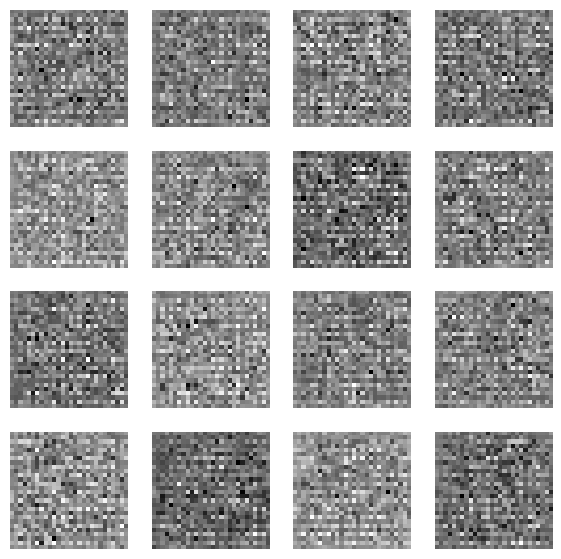

In [ ]:
sample_images(generator) ## 학습이 안된 generator.

## training 함수

In [7]:
loss_list = [] # step별 loss 저장 리스트
acc_list = [] # step별 accuracy 저장 리스트
iteration_list = [] # loss와 accuracy를 저장한 "step 수" 저장 리스트

def train(train_image, iterations, batch_size, sample_interval):
    """
        [parameter]
            train_image: 진짜 이미지데이터셋
            iterations : 총 step수
            batch_size : batch size
            sample_interval: 몇 iteration당 한번씩 훈련결과를 출력/저장할 지의 간격
    """

    train_image = train_image/127.5-1 # -1 ~ 1사이로 scaling   # 전처리
    train_image = train_image[..., np.newaxis] #채널 차원 증가. (28, 28) => (28, 28, 1)

    # Label 생성: fake-0, real: 1
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    # 학습
    for iteration in range(iterations):
        # 1반복 -> 1step
        ## 판별자 학습(1step) -> 생성자(gan이용) 학습(1step)

        #################################### 판별자 훈련
        # 정답에서 추출할 이미지의 index를 random 함수를 이용해 batch 개수만큼 조회
        idx = np.random.randint(0, train_image.shape[0], batch_size) # train set 이미지 리스트의 index 랜덤선택

        # 학습에 사용할 정답 이미지들 조회
        real_imgs = train_image[idx]

        # Fake image를 만들기 위해 generator에 넣어줄 잡음 생성.
        z = np.random.normal(0,1, (batch_size, 100))
        # Generator를 이용해 Fake image 생성
        gen_imgs = generator.predict(z)


        ### train_on_batch() : 1step 학습시키는 메소드
        d_loss_acc_real = discriminator.train_on_batch(real_imgs, real) #진짜 이미지로 학습
        d_loss_acc_fake = discriminator.train_on_batch(gen_imgs, fake) #생성자가 만든 가짜 이미지로 학습

        ## real, fake 의 결과값들의 평균 값 계산 후 각각 d_loss, acc에 할당.
        d_loss, acc = np.add(d_loss_acc_real, d_loss_acc_fake)*0.5

        ####################################생성자 훈련 - gan을 이용해서 훈련.
        z = np.random.normal(0, 1, (batch_size, 100)) # 잡음 생성

        gan_loss = gan.train_on_batch(z, real) # input으로 잡음과 정답을 전달
                                            ## 가짜로 생성된 이미지를 real이라고 판단하면 오차는 엄청 크다.
                                           ### 그렇게되면 역전파 과정에서 Generator의 파라미터가 많이 수정되면서
                                        #### 본래의 목적이었던 Generator 학습 시킬 수 있다.
                                    ##### 진짜로 생성된 이미지에 대해 real이라 판단한 것은 오차가 발생하지않고,
                                    ###### 따라서, Generator 학습도 진행되지 않게된다. (<-- 오차는 0이기 때문에)

        # 중간결과 확인
        if iteration % sample_interval == 0:
            loss_list.append((d_loss, gan_loss))
            acc_list.append(acc)
            iteration_list.append(iteration)
            print(f'{iteration} == 판별자 손실:{d_loss}, 판별자정확도:{acc}, gan 손실:{gan_loss}')
            sample_images(generator)

4/4 [==============================] - 9s 25ms/step
0 == 판별자 손실:0.6906309127807617, 판별자정확도:0.4449999928474426, gan 손실:0.6062507033348083
1/1 [==============================] - 0s 73ms/step


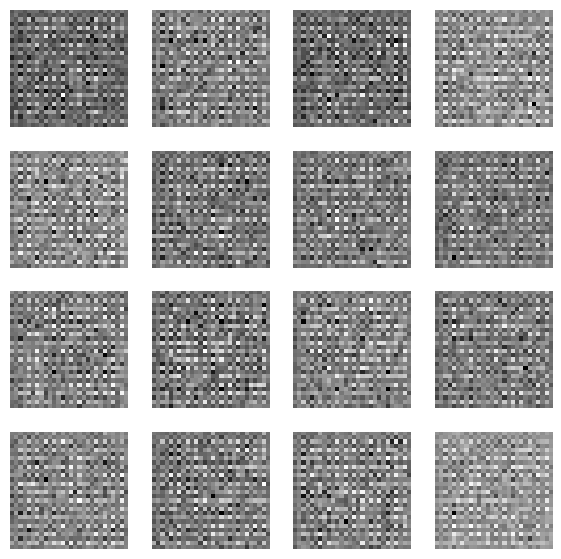

4/4 [==============================] - 0s 4ms/step
500 == 판별자 손실:0.23894080519676208, 판별자정확도:0.9099999964237213, gan 손실:1.9246853590011597
1/1 [==============================] - 0s 24ms/step


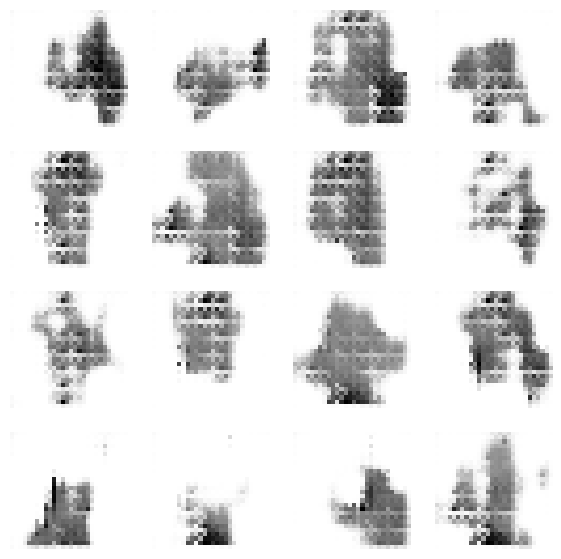

4/4 [==============================] - 0s 3ms/step
1000 == 판별자 손실:0.16961555182933807, 판별자정확도:0.9600000083446503, gan 손실:2.332808494567871
1/1 [==============================] - 0s 23ms/step


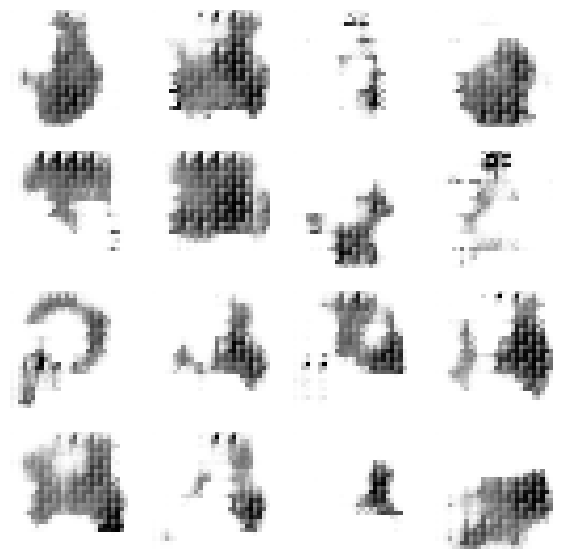

4/4 [==============================] - 0s 3ms/step
1500 == 판별자 손실:0.1502707675099373, 판별자정확도:0.9500000178813934, gan 손실:3.011481285095215
1/1 [==============================] - 0s 22ms/step


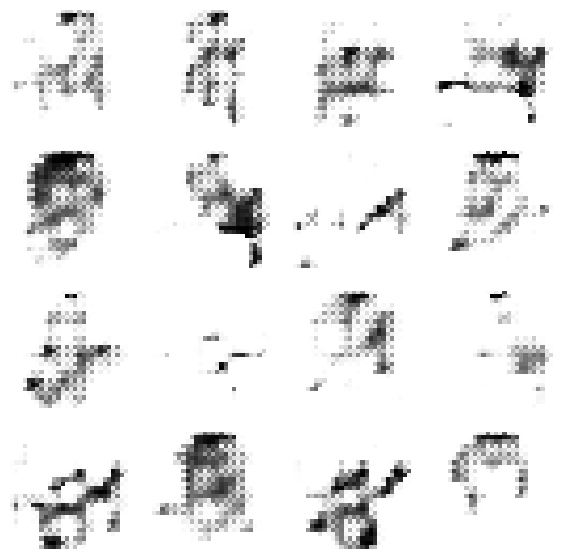

4/4 [==============================] - 0s 4ms/step
2000 == 판별자 손실:0.20088718831539154, 판별자정확도:0.929999977350235, gan 손실:2.810009717941284
1/1 [==============================] - 0s 17ms/step


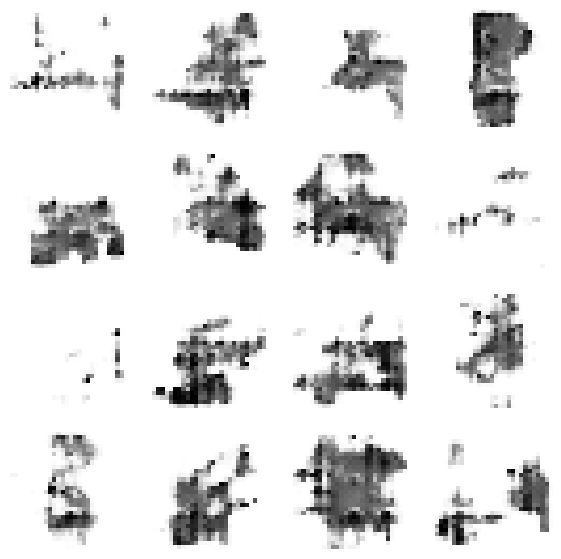

4/4 [==============================] - 0s 5ms/step
2500 == 판별자 손실:0.09100421145558357, 판별자정확도:0.9600000083446503, gan 손실:4.154550075531006
1/1 [==============================] - 0s 17ms/step


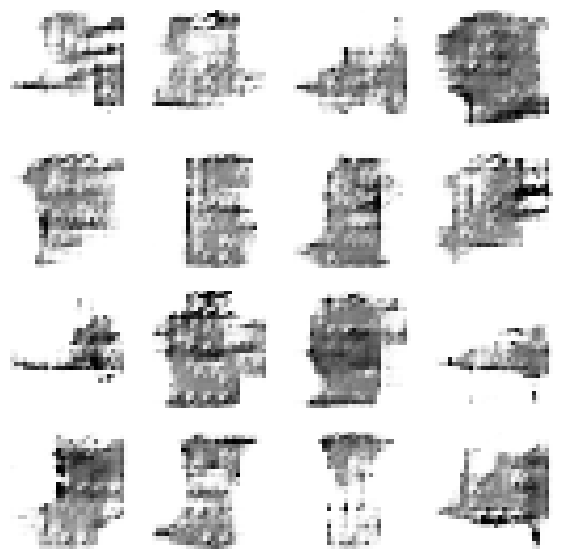

4/4 [==============================] - 0s 5ms/step
3000 == 판별자 손실:0.12868128344416618, 판별자정확도:0.9600000083446503, gan 손실:4.184284210205078
1/1 [==============================] - 0s 18ms/step


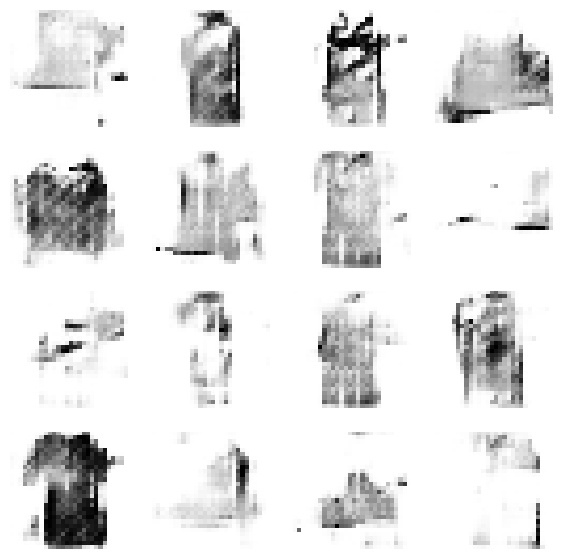

4/4 [==============================] - 0s 4ms/step
3500 == 판별자 손실:0.10174945741891861, 판별자정확도:0.9699999988079071, gan 손실:4.035265922546387
1/1 [==============================] - 0s 16ms/step


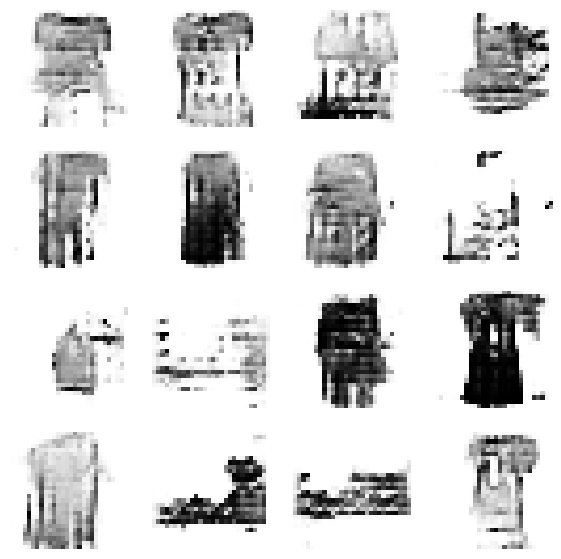

4/4 [==============================] - 0s 5ms/step
4000 == 판별자 손실:0.10676968470215797, 판별자정확도:0.9549999833106995, gan 손실:4.14494514465332
1/1 [==============================] - 0s 16ms/step


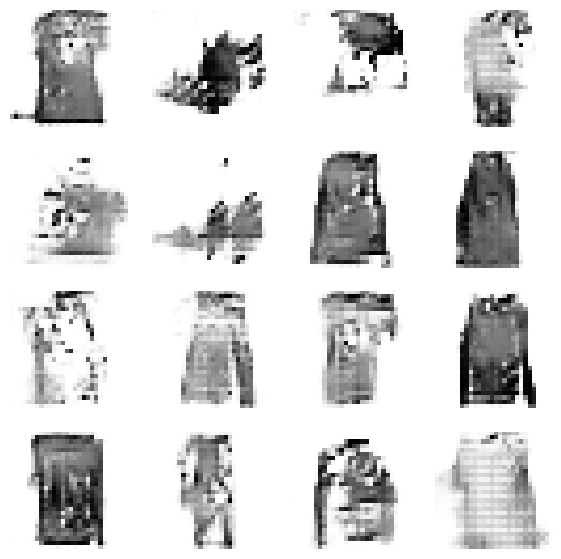

4/4 [==============================] - 0s 3ms/step
4500 == 판별자 손실:0.13662605360150337, 판별자정확도:0.9550000131130219, gan 손실:3.3678338527679443
1/1 [==============================] - 0s 17ms/step


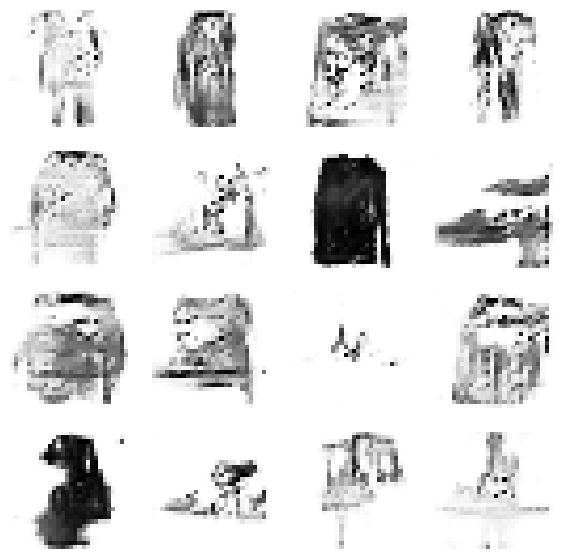

4/4 [==============================] - 0s 3ms/step
11.697217996915182 분


In [13]:
import time

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# iterations = 10000
iterations = 5000
batch_size=100
sample_interval=500
start = time.time()

train(X_train, iterations, batch_size, sample_interval)

end = time.time()
print((end-start)/60, '분')

In [14]:
save_path = '/content/drive/MyDrive/saved_model/fashion_mnist_gan'
generator.save(save_path)

# 이미지 생성

In [15]:
import tensorflow as tf
save_path = '/content/drive/MyDrive/saved_model/fashion_mnist_gan'
saved_generator = tf.keras.models.load_model(save_path)

In [16]:
z = np.random.normal(0, 1, (3, 100))
pred = saved_generator.predict(z)

1/1 [==============================] - 0s 177ms/step


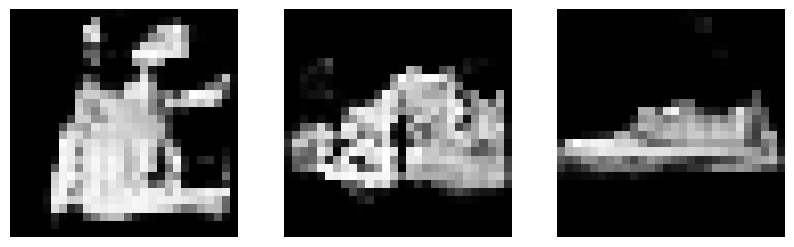

In [17]:
plt.figure(figsize=(10,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(pred[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()